# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

#### I am going to have to scrape the each csv from the following website to get what I want: http://data.un.org/Explorer.aspx. 
#### I am looking to get info on all commodity trading within the commodity trade statistics database.
#### It looks like there are 99 csv files that I will need to scrape. I will write a text file with the link to each csv.

In [72]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import sys
import time
import pandas as pd

def latest_download_file():
      path = r'/Users/michaelrocchio/Downloads/'
      os.chdir(path)
      files = sorted(os.listdir(os.getcwd()), key=os.path.getmtime)
      newest = files[-1]
      return newest
### you have to click a js link that generates a return link in the url bar so I will only be able to do this once without updating the script. And I have to be quick about it.
### There are 99 commodity types.
completed_pages=[]
urls=[]
metadata=[]

for i in range(1,99):
    try:
        driver=webdriver.Chrome()
        driver.implicitly_wait(1)
        link="http://data.un.org/Data.aspx?d=ComTrade&f=_l1Code:{}&c=2,3,5,7,8,9,11,12&s=_crEngNameOrderBy:asc,yr:desc,_l2Code:asc&v=1".format(i)
        driver.get(link)
        metadata_element=driver.find_element(By.XPATH, '//*[@id="ctl00_main_container"]/div[2]/h2')
        meta_text=metadata_element.text
        meta_text=meta_text.replace('Search glossaries', '')
        dropdown_element=driver.find_element(By.XPATH, '//*[@id="ctl00_main_actions_download"]/a[2]')
        dropdown_element.click()
        js_element=driver.find_element(By.XPATH, '//*[@id="downloadCommaLink"]/img')
        js_element.click()
        fileends='crdownload'
        while "crdownload" == fileends:
            time.sleep(1)
            newest_file = latest_download_file()
            if "crdownload" in newest_file:
                fileends = "crdownload"
            else:
                fileends = "none"
        driver.quit()
        time.sleep(.5)
        os.rename("/Users/michaelrocchio/Downloads/{}".format(latest_download_file()), "/Users/michaelrocchio/Desktop/EDA_Project/UN_Data/UNdata{}.zip".format(i-1))
        metadata.append(meta_text)
        completed_pages.append(i)
        urls.append(link)
    except:
        print("URL Expired at page {}".format(i))
        exp_page=i-1
        sys.exit(1)

In [83]:
meta_df=pd.DataFrame({
    'Page': completed_pages,
    'URL': urls,
    'Description': metadata
})
meta_df['Description']=meta_df['Description'].str.replace('Trade of goods', '')
remove_snip=len(', US$, HS 1992, ')
meta_df['Description']=meta_df['Description'].str[remove_snip:]
meta_df.to_csv('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Metadata.csv', index=False)
meta_df

,Page,URL,Description
0,1,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,ALL COMMODITIES
1,2,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,01 Live animals
2,3,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,02 Meat and edible meat offal
3,4,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"03 Fish, crustaceans, molluscs, aquatic inver..."
4,5,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"04 Dairy products, eggs, honey, edible animal..."
...,...,...,...
93,94,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"94 Furniture, lighting, signs, prefabricated ..."
94,95,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"95 Toys, games, sports requisites"
95,96,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,96 Miscellaneous manufactured articles
96,97,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"97 Works of art, collectors pieces and antiques"


<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

### I choose this data because I was curious to see if I could find a correlation heatmap between various commodity metrics between one and another. I think I can do this with this larger dataset. I will most likely
### have to use heavier data processing tools to achieve this which I am comforatble with. 

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

### My primary goal within this project will be to do an EDA that looks into the correlation of different types of commodities and provide a heatmap of their correlation. I may also do a clustering analysis if I am feeling fancy.

In [ ]:
import zipfile
for file in os.listdir('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data'):
    if '.zip' in file:
        filename=file.replace('.zip','.csv')
        folder='folder_tmp'
        with zipfile.ZipFile('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data/{}'.format(file), 'r') as zip_ref:
            zip_ref.extractall('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Extract/folder_tmp/')
        new_file=os.listdir('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Extract/folder_tmp/')
        os.rename('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Extract/folder_tmp/{}'.format(new_file[0]), "/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Extract/{}".format(filename))

In [105]:
#### optimizing files
for i in os.listdir("/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Extract/"):
    parquet_name=i.replace('.csv','.parquet')
    if '.csv' in i:
        df_temp=pd.read_csv("/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Extract/{}".format(i))
        df_temp.to_parquet("/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Opt/{}".format(parquet_name))

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [107]:

### I will read the first file in.
df0=pd.read_parquet('/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Opt/UNdata0.parquet')
df0

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,ALL COMMODITIES,Import,7.406590e+09,NaN,No Quantity,0.0
1,Afghanistan,2018,ALL COMMODITIES,Export,8.845045e+08,0.0,No Quantity,0.0
2,Afghanistan,2018,ALL COMMODITIES,Re-Export,9.263097e+06,0.0,No Quantity,0.0
3,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09,NaN,No Quantity,NaN
4,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08,NaN,No Quantity,NaN
...,...,...,...,...,...,...,...,...
10139,Zimbabwe,2001,ALL COMMODITIES,Export,1.206663e+09,NaN,No Quantity,NaN
10140,Zimbabwe,2001,ALL COMMODITIES,Re-Export,1.594229e+07,NaN,No Quantity,NaN
10141,Zimbabwe,2000,ALL COMMODITIES,Export,1.879631e+09,NaN,No Quantity,NaN
10142,Zimbabwe,1995,ALL COMMODITIES,Import,2.658853e+09,NaN,No Quantity,NaN


In [112]:
import warnings
warnings.filterwarnings('ignore')
final_df=pd.DataFrame()
for i in os.listdir("/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Opt/"):
    tempdf=pd.read_parquet("/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Opt/{}".format(i))
    tempdf['origin_file']=i.replace('.parquet','')
    final_df=final_df.append(tempdf).reset_index(drop=True)
final_df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9.659279e+06,8310819.00,Weight in kilograms,8310819.00,UNdata19
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1.034729e+06,104542.60,Weight in kilograms,104542.60,UNdata19
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1.201180e+06,586785.15,Weight in kilograms,586785.15,UNdata19
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1.521576e+06,619217.12,Weight in kilograms,619217.12,UNdata19
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,6.307901e+05,290356.00,Weight in kilograms,290356.00,UNdata19
...,...,...,...,...,...,...,...,...,...
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,1.821299e+07,658146.00,Weight in kilograms,658146.00,UNdata41
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,5.147759e+07,1089197.00,Weight in kilograms,1089197.00,UNdata41
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3.972237e+06,196520.00,Weight in kilograms,196520.00,UNdata41
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,4.652490e+05,10265.00,Weight in kilograms,10265.00,UNdata41


In [113]:
### I am going to give this to you in a compressed parquet format as it is large.
final_df.to_parquet('/Users/michaelrocchio/Desktop/EDA_Project/UNdata_full.parquet.gzip', compression='gzip')

In [114]:
### it can be read in with the following code like any other parquet file.:
final_df=pd.read_parquet('/Users/michaelrocchio/Desktop/EDA_Project/UNdata_full.parquet.gzip')

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [115]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
final_df.info()
# TODO: Use the head() method to inspect the first five (or more) rows of the data
print(final_df.head(5))
# TODO: Use the tail() method to inspect the last five (or more) rows of the data]
final_df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410656 entries, 0 to 8410655
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Country or Area  object 
 1   Year             int64  
 2   Commodity        object 
 3   Flow             object 
 4   Trade (USD)      float64
 5   Weight (kg)      float64
 6   Quantity Name    object 
 7   Quantity         float64
 8   origin_file      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 577.5+ MB
  Country or Area  Year                                          Commodity  \
0     Afghanistan  2018                 Sweet biscuits, waffles and wafers   
1         Albania  2018  Infant foods of cereals, flour, starch or milk...   
2         Albania  2018  Mixes and doughs for bread, pastry, biscuits, ...   
3         Albania  2018  Malt extract & limited cocoa pastrycooks produ...   
4         Albania  2018         Uncooked egg pasta not stuffed or prepared   

     Flow   Trade (USD)  

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,18212990.0,658146.0,Weight in kilograms,658146.0,UNdata41
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,51477587.0,1089197.0,Weight in kilograms,1089197.0,UNdata41
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3972237.0,196520.0,Weight in kilograms,196520.0,UNdata41
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,465249.0,10265.0,Weight in kilograms,10265.0,UNdata41
8410655,Sweden,2012,"Sheep or lamb skin leather, nes",Import,766658.0,11214.0,Weight in kilograms,11214.0,UNdata41


<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

In [11]:
import pandas as pd
df=pd.read_parquet("/Users/michaelrocchio/Desktop/EDA_Project/UNdata_full.parquet.gzip")
df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9.659279e+06,8310819.00,Weight in kilograms,8310819.00,UNdata19
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1.034729e+06,104542.60,Weight in kilograms,104542.60,UNdata19
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1.201180e+06,586785.15,Weight in kilograms,586785.15,UNdata19
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1.521576e+06,619217.12,Weight in kilograms,619217.12,UNdata19
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,6.307901e+05,290356.00,Weight in kilograms,290356.00,UNdata19
...,...,...,...,...,...,...,...,...,...
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,1.821299e+07,658146.00,Weight in kilograms,658146.00,UNdata41
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,5.147759e+07,1089197.00,Weight in kilograms,1089197.00,UNdata41
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3.972237e+06,196520.00,Weight in kilograms,196520.00,UNdata41
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,4.652490e+05,10265.00,Weight in kilograms,10265.00,UNdata41


In [30]:
##### Due to inflation and the fact that the data is in US dollars, I will only be looking at data begginning at 2015.as_integer_ratio
df=df[df['Year']>=2015].reset_index(drop=True)
df.shape

(1367891, 9)

In [31]:
meta=pd.read_csv("/Users/michaelrocchio/Desktop/EDA_Project/UN_Data_Metadata.csv")
meta

,Page,URL,Description
0,1,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,ALL COMMODITIES
1,2,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,01 Live animals
2,3,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,02 Meat and edible meat offal
3,4,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"03 Fish, crustaceans, molluscs, aquatic inver..."
4,5,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"04 Dairy products, eggs, honey, edible animal..."
...,...,...,...
93,94,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"94 Furniture, lighting, signs, prefabricated ..."
94,95,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"95 Toys, games, sports requisites"
95,96,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,96 Miscellaneous manufactured articles
96,97,http://data.un.org/Data.aspx?d=ComTrade&f=_l1C...,"97 Works of art, collectors pieces and antiques"


In [32]:
print("Unique Countries: {}".format(df['Country or Area'].nunique()))

Unique Countries: 171


In [33]:
print("Unique Years: {}".format(df['Year'].sort_values().nunique()))

Unique Years: 5


In [34]:
print("Unique Countries: {}".format(meta['Description'].nunique()))

Unique Countries: 98


#### The primary thing that I hope to learn from this data is what commodities have similar correlations in index prices.
#### I have a hunch, based on general economic understanding, that certian types of commodities are correlated with one and another.
#### I will also eventually seperate the dataset into an import and export dataset. 

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

#### The overall population of the data being represented is the import and exports for each country. 

In [35]:
print("The total sample size is {}".format(df.shape[0]))

The total sample size is 1367891


<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

 ##### This data was collected by each country reporting their own numbers. As this is a comprehensive aggregated dataset no weighting of the sample set was done. 

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367891 entries, 0 to 1367890
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Country or Area  1367891 non-null  object 
 1   Year             1367891 non-null  int64  
 2   Commodity        1367891 non-null  object 
 3   Flow             1367891 non-null  object 
 4   Trade (USD)      1367891 non-null  float64
 5   Weight (kg)      1307608 non-null  float64
 6   Quantity Name    1367891 non-null  object 
 7   Quantity         1351255 non-null  float64
 8   origin_file      1367891 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 93.9+ MB


<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

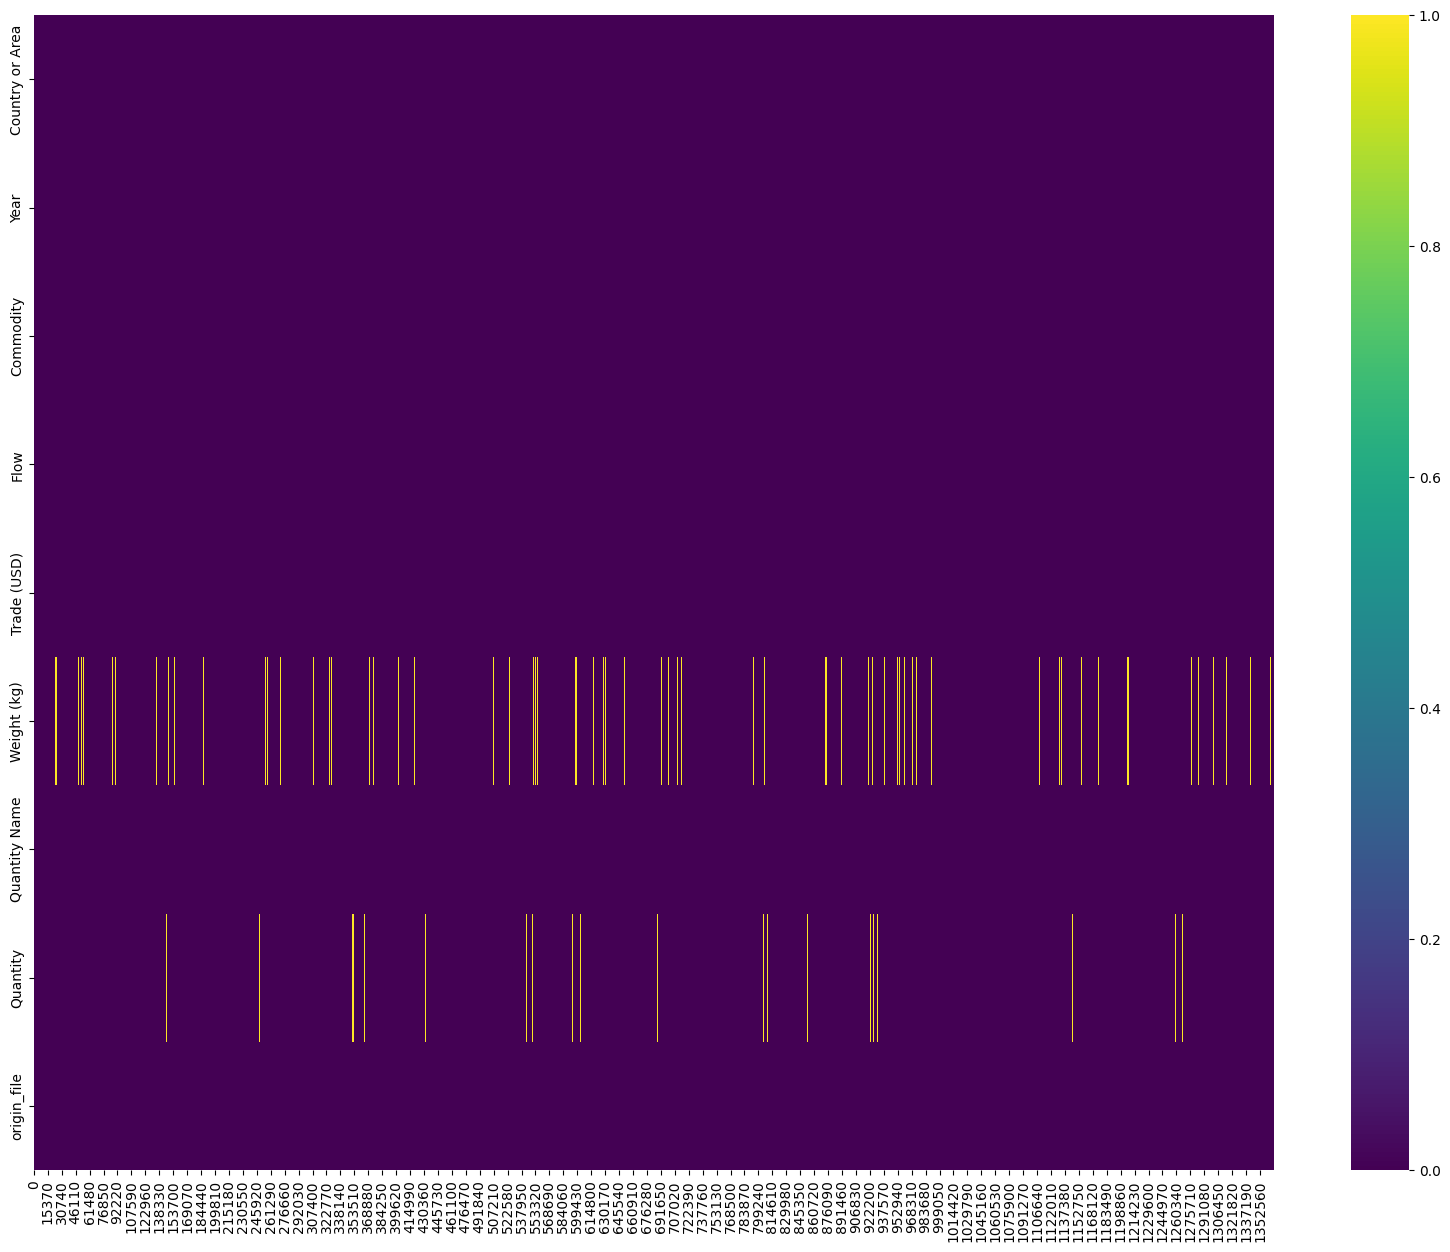

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull().T, cmap='viridis')
plt.show()

In [38]:
##### It is looking like this dataset is quite clean already and I am not thinking that much cleaning work will need to be done. 
##### So it appears that there are null values within the Weight and Quantity columns. I will need one of these two to determine a baseline value as I do my further analysis.
##### I am going to remove all values that do not have a quantity value and use that as my baseline for now.

In [48]:
print(df.shape)
df=df.dropna(subset=['Quantity'])
print(df.shape)

(1367891, 9)
(1351255, 9)


In [40]:
##### I am now going to look at the distributions of each of the numeric variables. I demonstrated above that there are an expected number of unique variables for year, country and commodity. 

In [45]:
import matplotlib.pyplot as plt

df['Quantity'].describe().apply(lambda x: format(x, 'f'))

count           1351255.000000
mean           63454180.214530
std         14619420026.325583
min                   0.000000
25%                 543.000000
50%               23448.000000
75%              495465.500000
max      16056531237192.000000
Name: Quantity, dtype: object

In [47]:
df['Trade (USD)'].describe().apply(lambda x: format(x, 'f'))

count          1367891.000000
mean         129234227.175891
std         9360892337.972712
min                  0.001806
25%              13826.000000
50%             224565.540000
75%            2926030.066771
max      2611432490157.000000
Name: Trade (USD), dtype: object

In [51]:
##### For each of these values I will now cut out any zero fields as they wont be useful for my analysis. I will also round the variables to the nearest whole number. This is alright for USD because it is the overall amount of trade.

print(df.shape)
df['Quantity']=round(df['Quantity'],0)
df['Trade (USD)']=round(df['Trade (USD)'],0)

df=df[df['Quantity']!=0]
df=df[df['Trade (USD)']!=0]
print(df.shape)


(1351255, 10)
(1270680, 10)


In [ ]:
##### As we can see above, there are some pretty extreme outliers for all three of the numeric variables. However I am hesitant to cut them out at this time. 
##### I will need to do some more research on the data to determine if these values are useful to my analysis or not. I suspect that they will be. 

In [53]:
#### I will now create a price per unit column to help with my analysis.
df['price_unit']=df['Trade (USD)']/df['Quantity']
df['price_unit'].describe().apply(lambda x: format(x, 'f'))

count       1270680.000000
mean          45506.803602
std         5967324.968378
min               0.000001
25%               1.793436
50%               5.475272
75%              19.074838
max      6200551566.000000
Name: price_unit, dtype: object

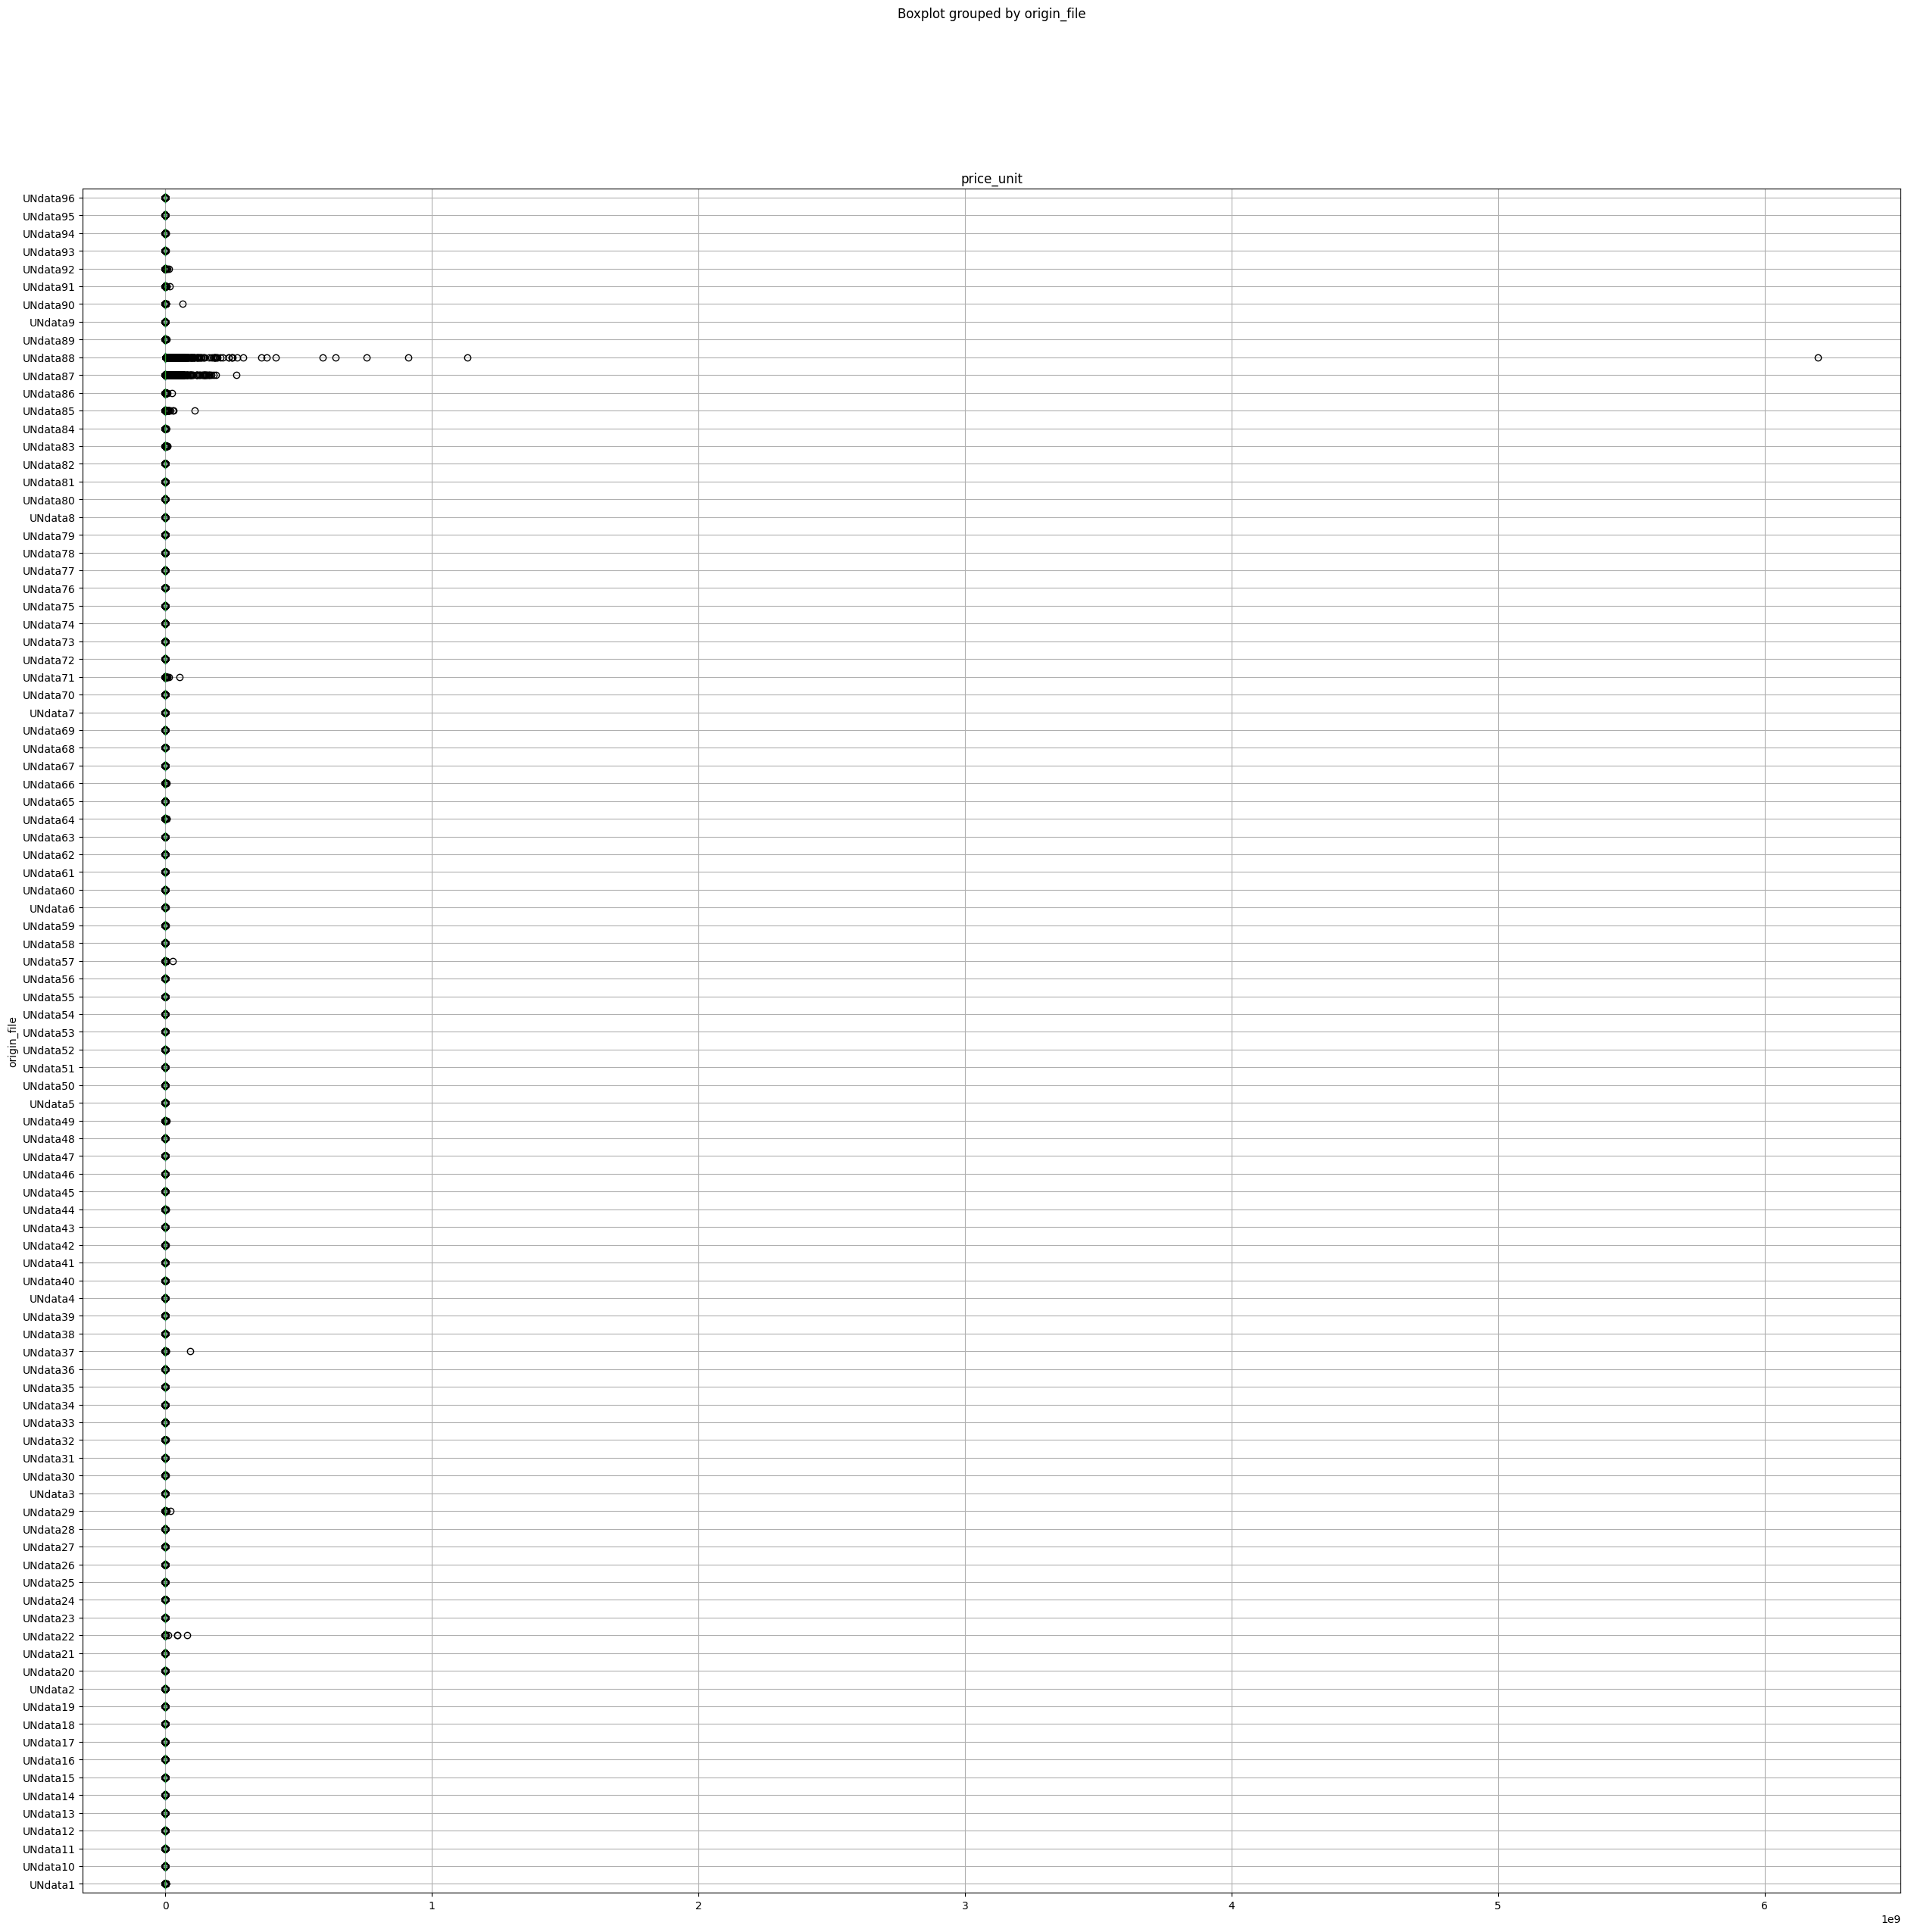

In [60]:
##### To remove outliers we will need to look at the distributions of each commodity. This will get messy fast.

fig, ax = plt.subplots(figsize=(30,30))
df.boxplot(column='price_unit', by='origin_file', ax=ax, vert=False)
plt.show()

In [61]:
#### As we can see above undata88 has some pretty heavy outliers. I will inspect it first.

In [63]:
undata88=df[df['origin_file']=='UNdata88']
undata88.sort_values(by='price_unit', ascending=False).head(10)

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,origin_file,price_unit
804106,Australia,2017,"Floating, submersible drilling or production p...",Import,6.200552e+09,NaN,Number of items,1.0,UNdata88,6.200552e+09
811998,Norway,2015,"Floating, submersible drilling or production p...",Import,2.265408e+09,6.464773e+07,Number of items,2.0,UNdata88,1.132704e+09
805234,Brazil,2018,"Floating docks, special function vessels nes",Re-Import,3.644270e+09,1.707310e+08,Number of items,4.0,UNdata88,9.110675e+08
805313,Brazil,2015,"Floating docks, special function vessels nes",Export,1.508510e+09,1.822730e+08,Number of items,2.0,UNdata88,7.542549e+08
811944,Norway,2017,"Floating, submersible drilling or production p...",Import,1.278325e+09,7.953320e+07,Number of items,2.0,UNdata88,6.391623e+08
816167,United Kingdom,2016,"Floating, submersible drilling or production p...",Export,5.906343e+08,6.000000e+06,Number of items,1.0,UNdata88,5.906343e+08
811999,Norway,2015,"Floating, submersible drilling or production p...",Export,4.132448e+08,2.410000e+07,Number of items,1.0,UNdata88,4.132448e+08
808611,Guyana,2018,"Floating, submersible drilling or production p...",Import,1.524384e+09,1.035894e+05,Number of items,4.0,UNdata88,3.810959e+08
807775,Finland,2018,"Cruise ships, excursion boats, ferry boats",Export,7.178331e+08,8.087800e+07,Number of items,2.0,UNdata88,3.589166e+08
816122,United Kingdom,2017,"Floating, submersible drilling or production p...",Import,1.168007e+09,9.669484e+07,Number of items,4.0,UNdata88,2.920017e+08


In [ ]:
#### This makes sense as countries will spend alot on drilling equiptment. I do not want to remove this variable because I would like to see if it has any correlation on oil prices. Eg. would the increased investment 
#### from the country result in an immediate increase in the oil exports from the country?

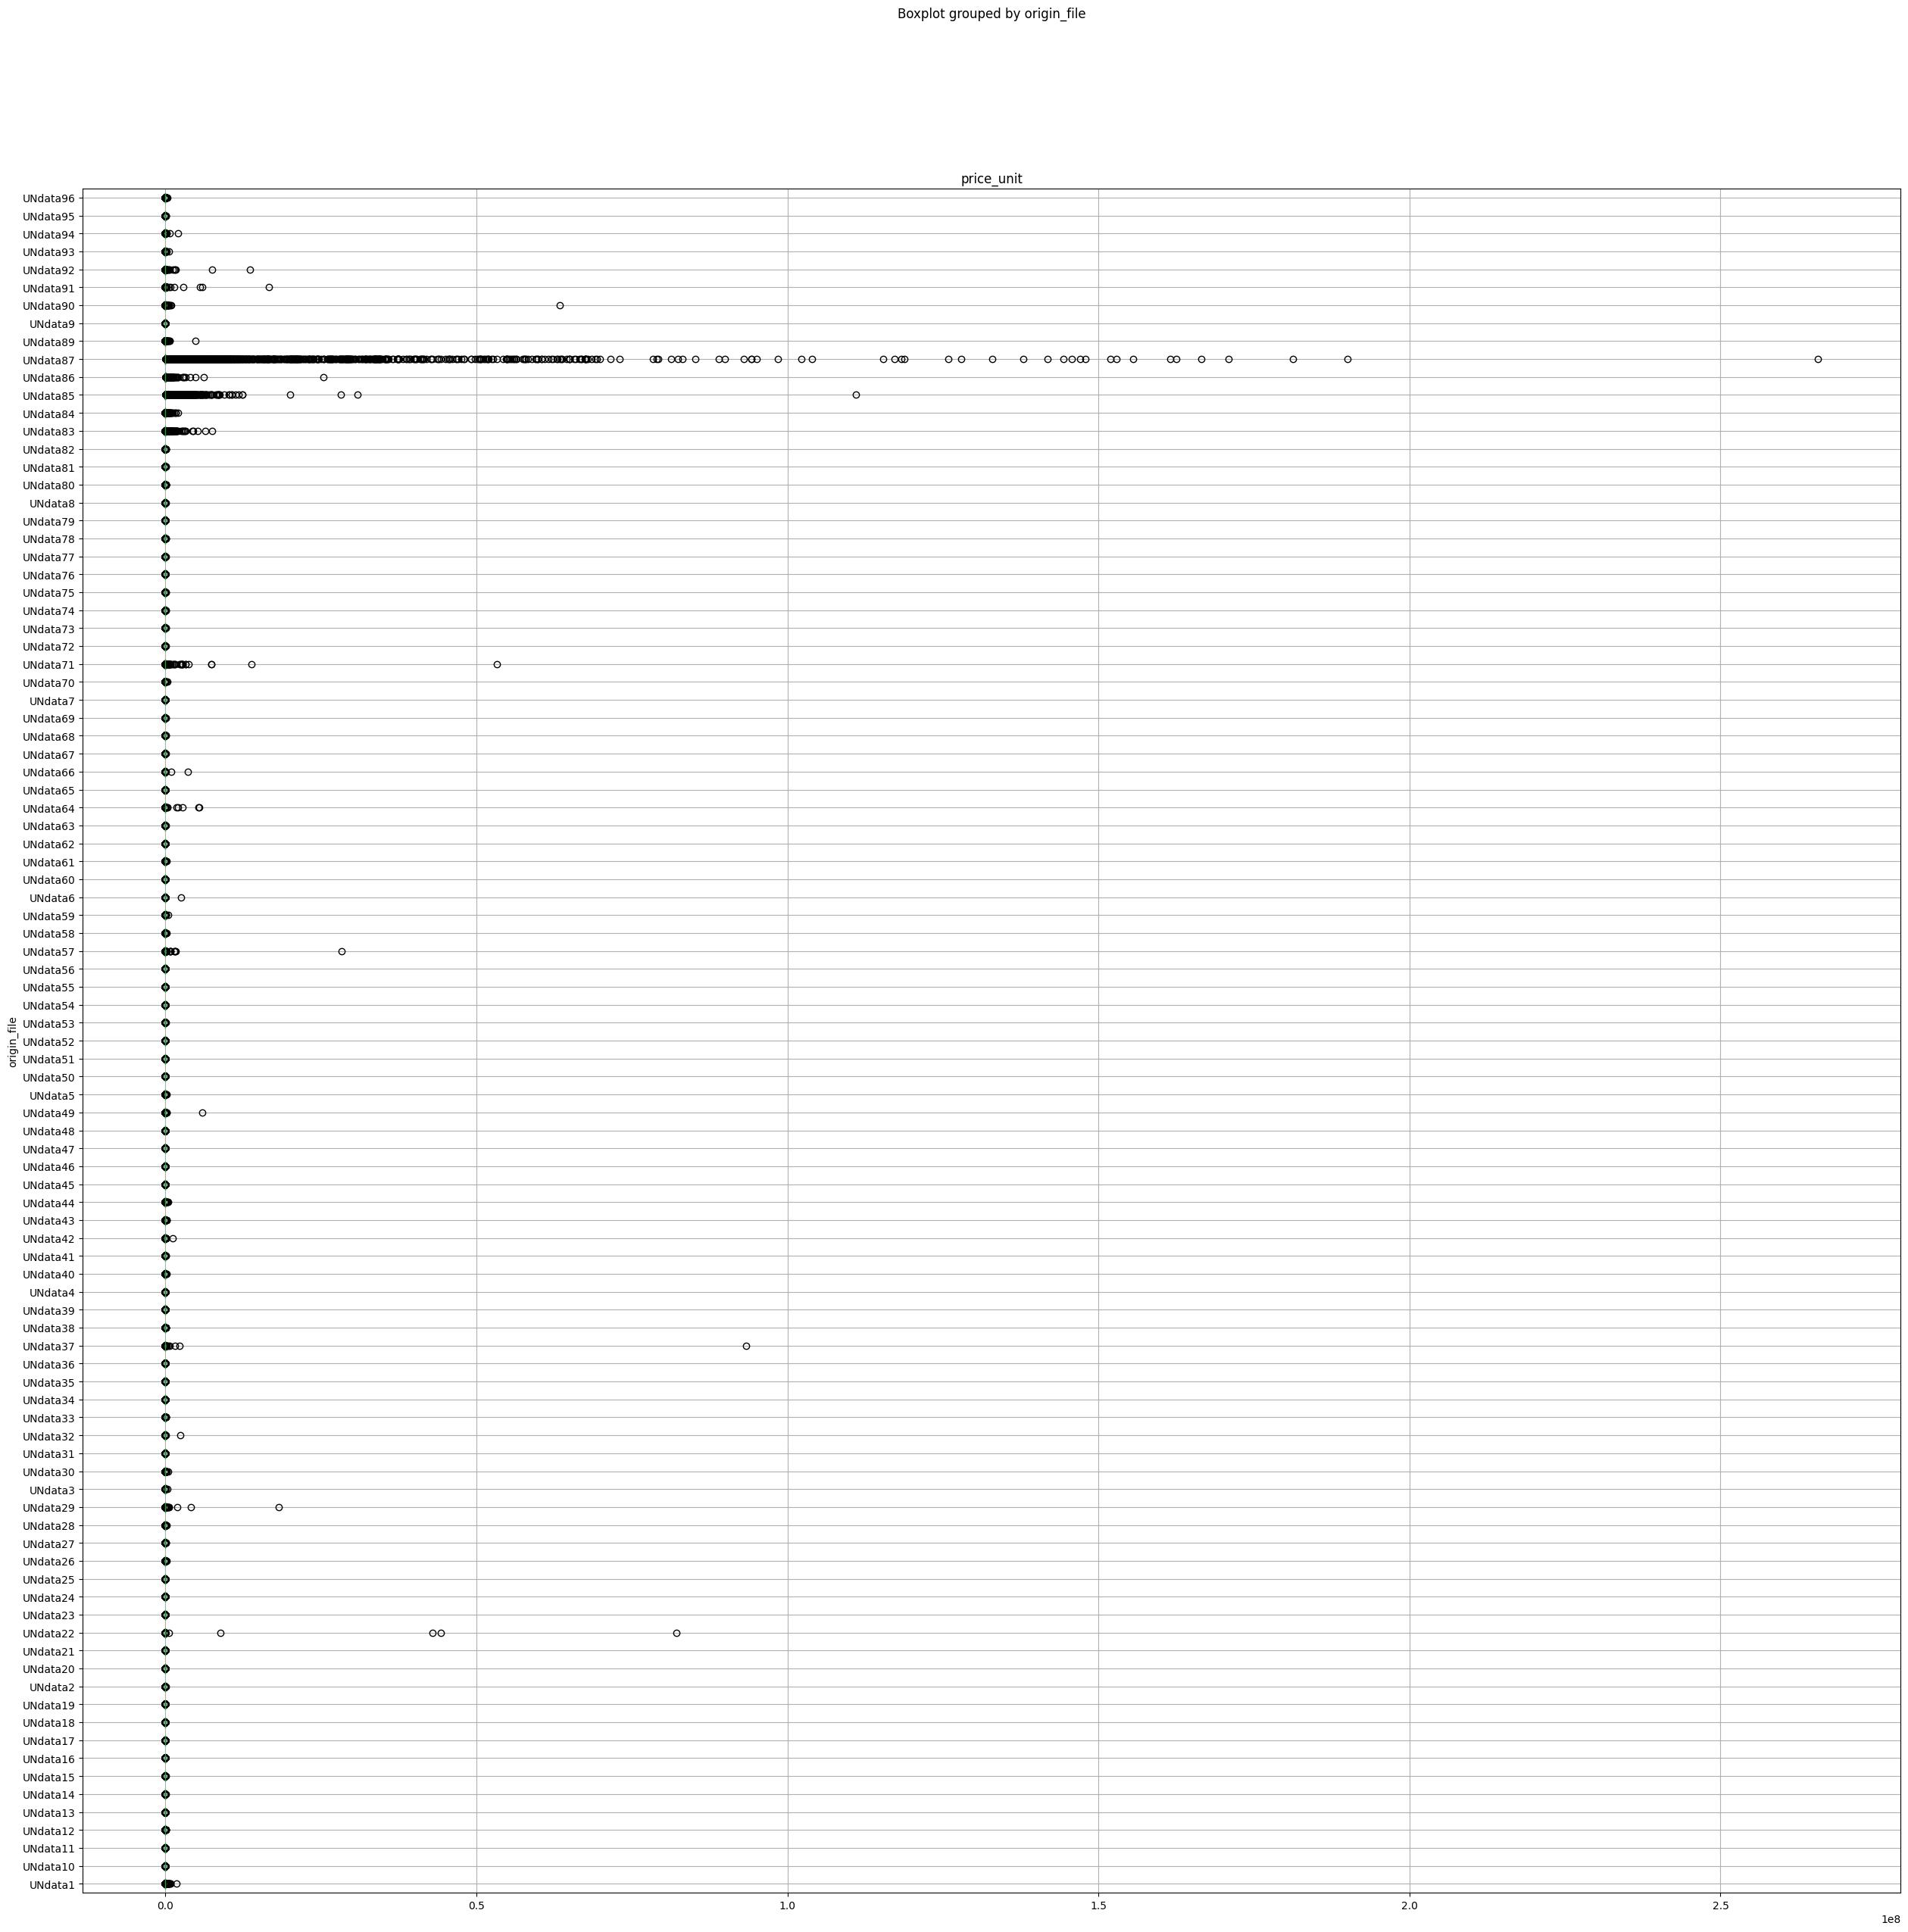

In [64]:
##### Because the UNdata88 is causing the graph to be so skewed, I will remove it from the graph and then look at the rest of the data

fig, ax = plt.subplots(figsize=(30,30))
df[df['origin_file']!='UNdata88'].boxplot(column='price_unit', by='origin_file', ax=ax, vert=False)
plt.show()

In [ ]:
##### Next lets look at 

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

In [ ]:
###Out of the three primary visualization tools mentioned above, the one that I see myself using the most in my career would be matplotlib. From my work experience I have used matplotlib on occasion, I usually use it to make visualization of a segment of my data in a report.  Going further in my career, I do see myself using matplotlib a lot more to make visualization of my analysis, and don't see the need for it going away anytime soon. An interesting way that I found matplotlib library used was in an article name "3D plotting in Python using matplotlib" by Shahbaz Khan. The ability to do 3D visualization can open up a wide array of possibilities when concerning graphs that can incorporate x, y and z variables. Its most common uses cases for 3D visualization is the attempt to show the relationship between these three variables and its impact in analysis. The most interesting part of this article that stood out to me was plot_surface where matplotlib can help you create surfaces in 3d space. I really hope to utilize 3D visualizations in my work later down the line but don't know too much of how it can be applied to data engineering, a career choice in data I would like to pursue further on. 

## n